# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set()

df = pd.read_csv('data/human_body_temperature.csv')

# 1. Is the distribution of the body temperatures normal? 

One of the first things to do when working with a new dataset is to simply plot a histogram. This may give us a feel for whether it is normally distributed. 

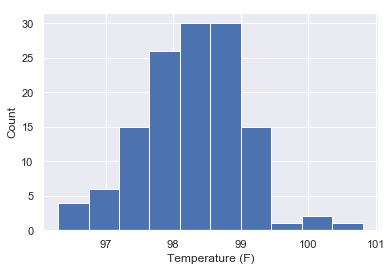

In [2]:
_=plt.hist(df['temperature'])
_=plt.xlabel('Temperature (F)')
_=plt.ylabel('Count')
plt.show()

The distribution appears pretty normal, but it's hard to tell because of the relatively low sample count. Let's compare the ECDF to a normal ECDF to see how well it fits.
The following function provides a way to display the Empirical Cumulative Distribution Function (ECDF). 

In [3]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # number of data points: n
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, len(x)+1) / n
    
    return x, y

Below we plot the ECDF of our sample (Orange dots) to a normal distribution of 10000 samples. 

Mean =  98.24923076923078
Std Dev =  0.7303577789050377


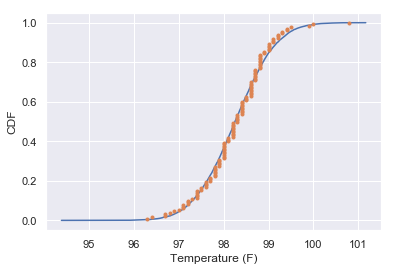

In [4]:
# Compute mean and standard deviation
mu = np.mean(df['temperature'])
sigma = np.std(df['temperature'])

print("Mean = ", mu)
print("Std Dev = ", sigma)

# Sample out of a normal distribution with mu and sigma
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(df['temperature'])

# Plot the CDFs and display 
_=plt.plot(x_theor, y_theor)
_=plt.plot(x, y, marker='.', linestyle='none')
_=plt.xlabel('Temperature (F)')
_=plt.ylabel('CDF')
plt.show()

Based on this, I think we can safely say that the data are normally distributed. It lines up with the normal distribution fairly well. 

# 2. Is the sample size large? Are the observations independent?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


It appears that the sample size n is 130. This is over the accepted standard for valid t-intervals. For our purposes, it's large enough. Because our population is presumably all of the human race, the sample size of 130 is a lot less than 10%, so the observations are independent. 

# 3. Is the true population mean really 98.6 degrees F?

First, let's try a bootstrap hypothesis test.

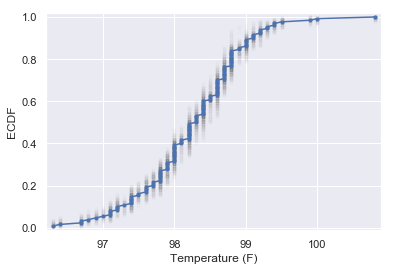

In [6]:
for _ in range(50):
    #Generate bootstrap sample
    bs_sample = np.random.choice(df['temperature'], len(df['temperature']))
    
    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _=plt.plot(x, y, marker='.', linestyle='none', alpha=.01, color='gray')
    
# Compute and plot ECDF from original data
x, y = ecdf(df['temperature'])
_=plt.plot(x, y, marker='.')

# Make margins and plot labels
plt.margins(0.02)

_=plt.xlabel("Temperature (F)")
_=plt.ylabel("ECDF")

# Show the plot
plt.show()

In [7]:
# This function takes a set of data and a function
# It applies that function to a bootstrap sample of the data
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [8]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates"""
    
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicates

0.06405661469519336
0.06395904495643784


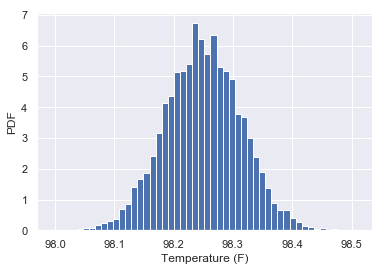

In [9]:
# Take 10,000 bootstrap replicates of the mean
bs_replicates = draw_bs_reps(df['temperature'], np.mean, size=10000)

# Compute and print Standard Error of the Mean (SEM)
sem = np.std(df['temperature']) / np.sqrt(len(df['temperature']))
print(sem)

# Compute and print the standard deviation of the bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel("Temperature (F)")
_ = plt.ylabel("PDF")

# Show the plot
plt.show()


In [10]:
p = np.sum(bs_replicates >= 98.6) / len(bs_replicates)
print("p = ", p)

p =  0.0


According to the bootstrap hypothesis test, it looks like the actual mean is unlikely to be 98.6 degrees Fahrenheit. 

Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

In this case, we know, or think we know the population parameter (98.6). We don't know the population standard deviation so we should do the one-sample test.

Null Hypothesis: Mean Temperature mu = 98.6


Alt Hypothesis: Mean Temperature mu != 98.6

Calculating the t-value: 

In [11]:
t = (np.mean(df['temperature']) - 98.6)/(np.std(df['temperature']) / np.sqrt(len(df['temperature'])))
print("t-value = ", t)

t-value =  -5.475925202078116


Looking at the t-value table at the row for df=100 (sample size = 130), we see that a t-value of 5.4759 doesn't even appear in the row. This means that we can reject the null hypothesis, even with an alpha = 0.01.

# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [12]:
# drawing a random sample of 10
small_sample = np.random.choice(df['temperature'], 10)

In [13]:
small_sample

array([98.5, 97.8, 96.8, 97.6, 98.2, 97.8, 97.2, 98.1, 98.6, 96.3])

One-sample Test

In [14]:
t = (np.mean(small_sample) - 98.6) / (np.std(small_sample) / np.sqrt(10))
print("t-value = ", t)

t-value =  -4.1071907787307005


# 6. Is there a significant difference between males and females in normal temperature?

In order to see if there is a difference between men and women, let's first split up our data by gender. 

In [17]:
women = df[df['gender'] == 'F']
men = df[df['gender'] == 'M']

In [18]:
women.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 129
Data columns (total 3 columns):
temperature    65 non-null float64
gender         65 non-null object
heart_rate     65 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.0+ KB


In [19]:
men.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 2 to 128
Data columns (total 3 columns):
temperature    65 non-null float64
gender         65 non-null object
heart_rate     65 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.0+ KB


To begin let's plot the ECDF of both groups to see if there is a visual difference. It's always a good idea to start with a visual exploration.

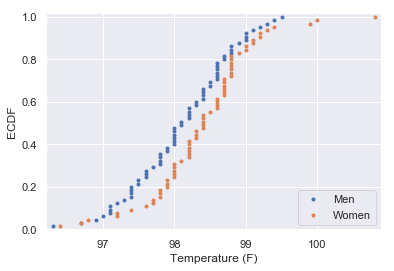

In [20]:
# Compute ECDFs 
x_men, y_men = ecdf(men['temperature'])
x_women, y_women = ecdf(women['temperature'])

# Plot the ECDFs 
_=plt.plot(x_men, y_men, marker='.', linestyle='none')
_=plt.plot(x_women, y_women, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_=plt.xlabel('Temperature (F)')
_=plt.ylabel('ECDF')
_=plt.legend(('Men', 'Women'), loc='lower right')

# Show the plot
plt.show()


Visually, it looks like women have higher temperatures. But let's use the two-sample test to see if this difference is statiscally significant.

Null hypothesis: Mean temp for women = Mean temp for men

Alternative hypothesis: Mean temp for women != Mean temp for men

Alpha = 0.05

In [26]:
# Compute the mean of the combined data set
combined_mean = np.mean(df['temperature'])

men_temp = men['temperature']
women_temp = women['temperature']

# Shift the samples
men_shifted = men_temp - np.mean(men_temp) + combined_mean
women_shifted = women_temp - np.mean(women_temp) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_men = draw_bs_reps(men_shifted, np.mean, 10000)
bs_replicates_women = draw_bs_reps(women_shifted, np.mean, 10000)

# Compute replicates of difference of means
bs_diff_replicates = bs_replicates_women - bs_replicates_men

# Compute the p-value
p = np.sum(bs_diff_replicates >= np.mean(women_temp) - np.mean(men_temp))/ len(bs_diff_replicates)

# Print p-value
print('p = ', p)

p =  0.0104


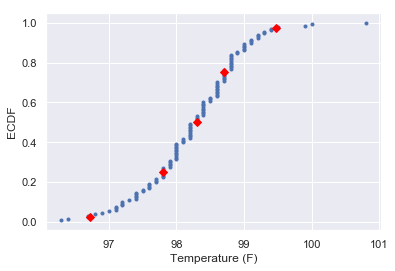

In [18]:
# Compute ECDF for temperature: x_temp, y_temp
x_temp, y_temp = ecdf(df['temperature'])

# Generate plot
_ = plt.plot(x_temp, y_temp, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('ECDF')

# Specify array of percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles
ptiles_temps = np.percentile(df['temperature'], percentiles)

# Overlay percentiles as red diamonds
_ = plt.plot(ptiles_temps, percentiles/100, marker='D', color='red', linestyle='none')

# Display the plot
plt.show()